fitting
D = 1.0031380996322108
MSD = 2Dt


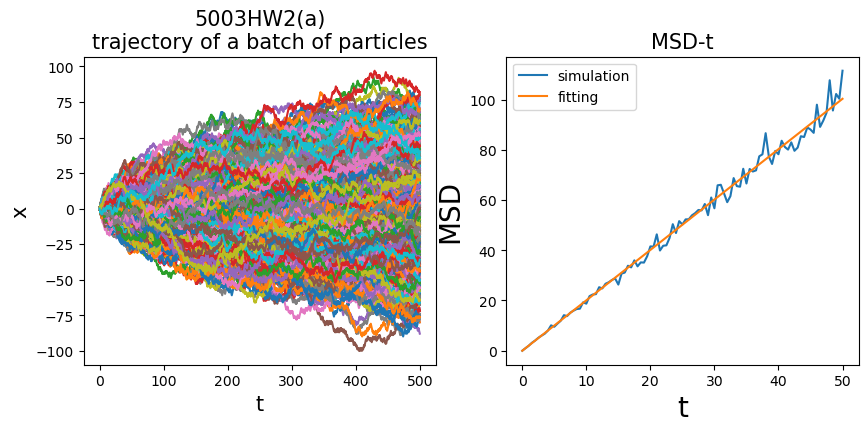

In [11]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.optimize import curve_fit


###plot the trajectory of a single particle:
plt.figure(figsize = (10,4))
plt.subplot(121)

step_n = 1000
origin = 0 
path=[]
for i in range(step_n):
    path.append([0])
for j in range(step_n):
    for i in range(1,step_n+1):
        delta = 1
        x = path[j][i-1]
        a= random.choice([-delta,delta])
        path[j].append(x+a)

t = [i*delta**2/2 for i in range(step_n+1)]
for i in range(step_n):
    plt.plot(t,path[i])
plt.xlabel('t',fontsize = 15)
plt.ylabel('x',fontsize = 15)
plt.title('5003HW2(a)\ntrajectory of a batch of particles',fontsize=15)


####plot the MSD--t picture
plt.subplot(122)
def fit_function(x,a):
    return a*x

MSD_list = [0]
step_count = 100
for i in range(1,step_count+1):
    SDS = 0
    test = 1000
    delta = 1
    
    for t in range(test):
        step_n = i
        step_set = [-delta,delta]
        pos = 0
        for j in range(i):
            pos += random.choice(step_set)
            
        SD = pos**2
        SDS += SD
    MSD = SDS/test
    MSD_list.append(MSD)
t = [i*delta**2/2 for i in range(step_count+1)]
#print (len(t),len(MSD_list))
plt.plot(np.array(t),np.array(MSD_list),label = 'simulation')
a = curve_fit(fit_function,t,MSD_list)
plt.xlabel('t',fontsize = 20)
plt.ylabel('MSD',fontsize = 20)
plt.plot(t, float(a[0])*np.array(t), label = 'fitting')
plt.legend(loc = 'best')
print("fitting")
print("D =",float(a[0])/2 )
print("MSD = 2Dt")
plt.title('MSD-t',fontsize=15)
plt.show()



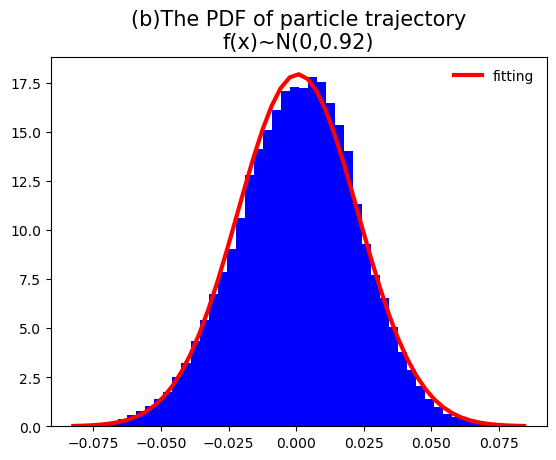

In [29]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.optimize import curve_fit

from scipy.stats import norm

step_n = 2000000
step_set = [-1,1]
origin = 0 
path = [0]
for i in range(1,step_n+1):
    delta = 0.001
    x = path[i-1]
    a= random.choice([-delta-delta*x,delta-delta*x])
    path.append(x+a)

##t = [i*delta**2/2 for i in range(step_n+1)]
##plt.plot(t,path)

total_moles = np.array(path[step_n//2:])
n,bins,apatches=plt.hist(total_moles,50,density=True,color = 'b')

(mu,sigma) = norm.fit(total_moles)
x = norm.pdf(bins,mu,sigma)
plt.plot(bins,x,linewidth = 3.0,color = 'r',label = 'fitting')
plt.legend(loc='best', frameon=False)
plt.title("(b)The PDF of particle trajectory\n"+f"f(x)~N({round(mu)},{round(sigma**sigma,2)})",fontsize=15)
plt.show()



#print(len(total_particles))








